In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import pylab
import numpy as np

# Outline
* Overview
Much of the key concepts in statistical mechanics can be learnt in one dimension. 
* Boltzmann Factors and the Harmonic Potential
We start with one the simplest system relavant to stat mech there can be: a system with a single coordinate. The potential energy and the temperature are possibly the most important quantities about the system. These are the quantites that will tell us everything about the system. Most impornatly the probability distribution. Pull out Boltzmann Factor out of thin air. We really need to be comfortable with Bolztmann factors and what it can do. 
    * High energy states less likely at low temps
    * We need normalization
    * It is factorizable (where is KE)
    * It helps us calculate averages

* Free energy from the perspective of state probabilities
What are states, what are state probabilities?
Let's stick to Boltzmann factors for states
This will give us free energy
* Discuss entropy
* Applying the 1D perspective
    * Protein folding
    * Ising model
* Loose ends






# Statistical Mechanics - Learning from Toy Systems

In this notebook, we will learn about equilibrium statistical mechanics using one dimensional toy systems. The material is taken mainly from [_Statistical Physics of Biomolecule - An Introduction by Daniel M. Zuckerman_](https://www.amazon.com/Statistical-Physics-Biomolecules-Daniel-Zuckerman/dp/1420073788). This is perhaps one of the most awesome books which is geared towards students from biochemistry/molecular biology background and somehow without using intense mathematical rigor, conveys the fundamental ideas and mathematical formalism behind main statistical mechanics concepts. We will also use or adapt  python code from [Pymbar](https://github.com/choderalab/pymbar) package and a paper by Michael R. Shirts, namely "[_Simple Quantitative Tests to Validate Sampling from Thermodynamic Ensembles_](http://pubs.acs.org/doi/abs/10.1021/ct300688p)". 

1D Harmonic Potential
=====================

Our main toy system is a single-well one-dimensional potential, which is an energy function of a single coordinate. We can consider this to be representative of a single state of a molecule. Such an energy function can be reasonably approximated by a Taylor series expansion about the value of coordinate, where the function takes the minimum value.

$U(x) = U(x_o) + (x - x_o)U^\prime(x_o) + \frac{1}{2}(x - x_o)^2U^{\prime\prime} + \dots$


Since we know that our energy function is parabolic in shape, therefore, we can simply the above equation. First, we note that the linear term (the one with single derivative of $U$ i.e., $U^\prime(x_o)$ disappers since the derivative at $x_o$ is zero. Furthermore, higher terms (not shown in the above equation) can be ignored since Taylor series approximation up to second order for an energy function like ours is sufficient. Hence, we can keep only the constant and quadratic terms and simply our potential to:

$U_{harm}(x) \equiv U_o + \frac{\kappa}{2}(x - x_o)^2$

where $\kappa = U^{\prime\prime}$. Note that $\kappa$ is spring constant, it determines the 'width' of our well/basin. We will later see that this happens to be a quantity of great interest. As an example, a simple 


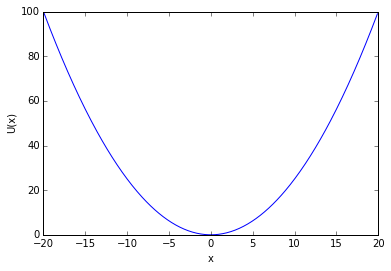

In [35]:

# set x_o
x_o = 0.0
# set \kappa
k = 0.5
# generate a range of x-xoordinate and correspond value of the potential
x_coord = np.arange(-20.0, 20, 0.1)
u_x = 0.5*k*((x_coord - x_o)**2)

pylab.xlabel('x')
pylab.ylabel('U(x)')
plt.plot(x_coord, u_x)


### Equilibrium Distribution

The first thing we are interested in is the probability distribution of $x$ at equilibrium. The Boltzmann factor let's us connect the energy with the probability distribution:

$\rho(x) \propto \exp\big[\frac{-U_{harm}(x)}{k_BT}\big]$

The proportionality constant here is of course the normalizing constant or the partition function. If we can obtain that, we will be able to write the analytical form for $\rho(x)$.  

$\int_{-\infty}^\infty \exp\big[\frac{-U_{harm}(x)}{k_BT}\big]dx$
= $\int_{-\infty}^\infty \exp\big[\frac{-U_o}{k_BT}\big]dx + \int_{-\infty}^\infty \exp\big[\frac{\kappa(x - x_o)^2)}{2k_BT}\big]dx$

The first integral evaluates to $x\frac{-U_o}{k_BT}$. Let's also consider at this point (for the sake of simplification) that $U_o = 0$. In such case, the first term is 0. Furthermore, let's also consider that $x_o = 0$, in which case $(x - x_o)^2$ simplifies to $x^2$. With this in hand, we can tackle the seocnd term as well.

We use the relation:

$\int_{-\infty}^\infty \exp\big[\frac{(x - x_o)^2)}{2\sigma^2}\big]dx = \sqrt{2\pi}\sigma$

We recognize that $\sigma^2 = \frac{k_BT}{\kappa}$ or $\sigma = \sqrt{\frac{k_BT}{\kappa}}$

This leads to the second term (and hence the partition function):

$\sqrt{\frac{2\pi k_bT}{\kappa}}$

This is a signficant result. Firstly, we have obtained the analytical expression for the partition function for this simple system (an ability that we will dearly miss for system of biophysical interest). Secondly, we are now in a position to obtain the expression for the equilibrium distribution of this system:

$\rho(x;k_BT,\kappa) = \sqrt{\frac{\kappa}{2\pi k_BT}} exp[-\kappa (x-x_0)^2 /2k_B T]$

The probability distribution corresponding to the potential shown above, is shown in the plot below.


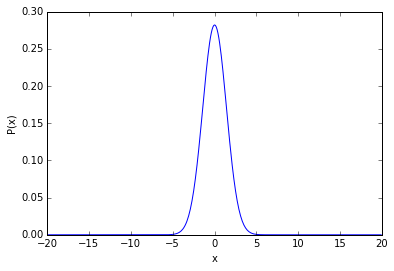

In [36]:
pylab.xlabel('x')
pylab.ylabel('P(x)')
p_x = np.sqrt(k/(2*np.pi))*np.exp((-k*(x_coord - x_o)**2.0)/2.0)
plt.plot(x_coord, p_x)

Testing a few double-well potentials:

_Example 1_
$W(x) = -x^2 + x^4/4 + ax$

In [1]:
def double_well_1(a, x):
    return (-x**2) + ((x**4)/4) + a*x

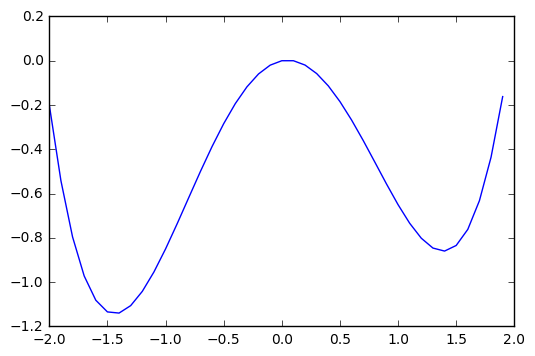

In [7]:
a = 0.1
x = np.arange(-2.0, 2.0, 0.1)
y = double_well_1(a, x)
plt.plot(x, y)

_Example 2_
$W(x) = 2x - 8x^2 + x^4$

In [8]:
def double_well_2(x):
    return (2*x) - (8*(x**2)) + x**4

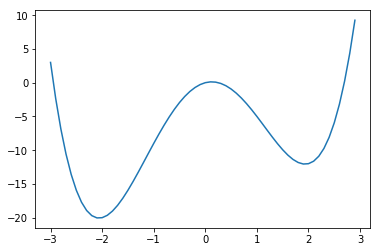

In [9]:
x = np.arange(-3.0, 3.0, 0.1)
y = double_well_2(x)
plt.plot(x, y)

_Example 3_

$W(x) = x^2(x-a)^2 + x$

In [3]:
def double_well_3(x):
    return ((x**2)*(x - a)**2) + x

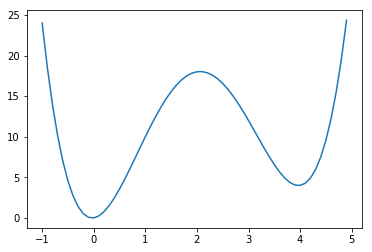

In [7]:
x = np.arange(-1.0, 5.0, 0.1)
a = 4.0
y = double_well_3(x)
plt.plot(x, y)